In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import urllib

In [30]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 52.1 MB/s eta 0:00:00


In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [20]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x78411c18dff0>)

In [31]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

In [34]:
test = pd.read_table("/content/ratings_test.txt")
train = pd.read_table("/content/ratings_train.txt")

In [35]:
train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


결측치 처리

In [47]:
train.dropna(inplace=True)
test.dropna(inplace=True)

워드 임베딩

In [48]:
okt = Okt()

# 불용어 목록
stop_words = "'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'"
stop_words = set(stop_words.strip("'").split("','"))

# 불용어 제거 함수
def remove_stopwords(text):
    # print(text)
    word_tokens = okt.morphs(text)
    return [word for word in word_tokens if word not in stop_words]

# apply를 사용하여 불용어 제거
train['cleaned_document'] = train['document'].apply(remove_stopwords)

print(train)


              id                                           document  label  \
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0   
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1   
2       10265843                                  너무재밓었다그래서보는것을추천한다      0   
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0   
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1   
...          ...                                                ...    ...   
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0   
149996   8549745                                      평점이 너무 낮아서...      1   
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0   
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1   
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0   

                                         cleaned_document  
0  

In [54]:
from keras.preprocessing.text import Tokenizer

# Tokenizer를 사용하여 단어를 정수 인덱스로 변환
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['cleaned_document'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train['cleaned_document'])

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sequences, train['label'], test_size= 0.2, random_state=1234, stratify=train['label'])

문장 길이 맞추기

In [56]:
#단어수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [57]:
#모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 500))
# model.add(Dropout(0.5))
# model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
# model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 500)         2500000   
                                                                 
 lstm_2 (LSTM)               (None, 55)                122320    
                                                                 
 dense_3 (Dense)             (None, 1)                 56        
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 2622376 (10.00 MB)
Trainable params: 2622376 (10.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
#모델 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [60]:
#학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [61]:
#모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stopping_callback])

Epoch 1/100
2250/2250 [==============================] - 86s 37ms/step - loss: 0.3891 - accuracy: 0.8216 - val_loss: 0.3580 - val_accuracy: 0.8377
Epoch 2/100
2250/2250 [==============================] - 45s 20ms/step - loss: 0.3165 - accuracy: 0.8590 - val_loss: 0.3552 - val_accuracy: 0.8430
Epoch 3/100
2250/2250 [==============================] - 41s 18ms/step - loss: 0.2787 - accuracy: 0.8769 - val_loss: 0.3646 - val_accuracy: 0.8384
Epoch 4/100
2250/2250 [==============================] - 41s 18ms/step - loss: 0.2415 - accuracy: 0.8941 - val_loss: 0.3910 - val_accuracy: 0.8376
Epoch 5/100
2250/2250 [==============================] - 42s 18ms/step - loss: 0.2035 - accuracy: 0.9111 - val_loss: 0.4238 - val_accuracy: 0.8309
Epoch 6/100
2250/2250 [==============================] - 40s 18ms/step - loss: 0.1666 - accuracy: 0.9285 - val_loss: 0.5206 - val_accuracy: 0.8278
Epoch 7/100
2250/2250 [==============================] - 41s 18ms/step - loss: 0.1367 - accuracy: 0.9421 - val_loss: 0

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
  plt.legend()
plt.show()

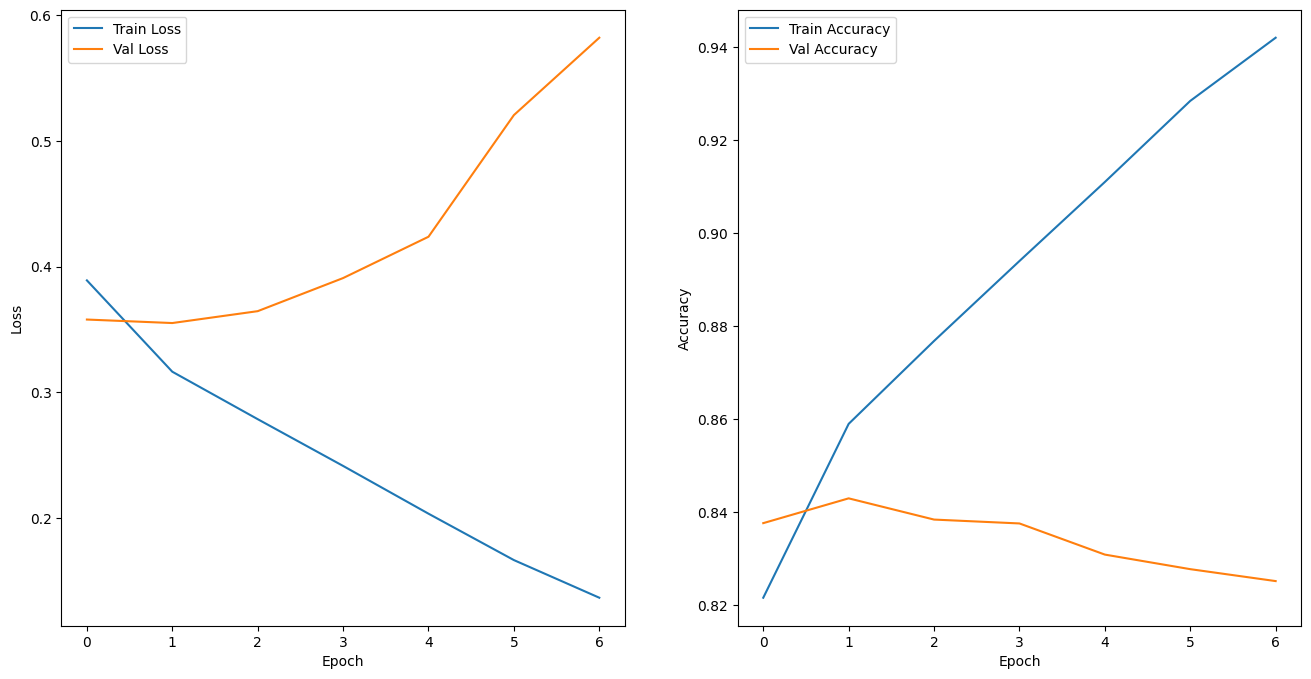

In [63]:
plot_history(history)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 예측
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int).flatten()  # 이진 분류 결과로 변환

# 평가 지표 계산
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# 과적합 됐을 가능성 높음 -> 정확도가 val 은 떨어지는데 train은 올라가는 경향성

938/938 [==============================] - 7s 7ms/step
Accuracy: 0.829294309810327
Precision: 0.8304242749731472
Recall: 0.8265953892415636
F1 Score: 0.8285054083922173
